In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [6]:
df['Rating'].value_counts()

,count
Rating,
5,9054
4,6039
3,2184
2,1793
1,1421


In [7]:
def ratings(rating):
  if rating > 3 and rating <= 5:
    return "Positive"
  if rating > 0 and rating <= 3:
    return "Negative"

In [8]:
df['Rating'] = df['Rating'].apply(ratings)

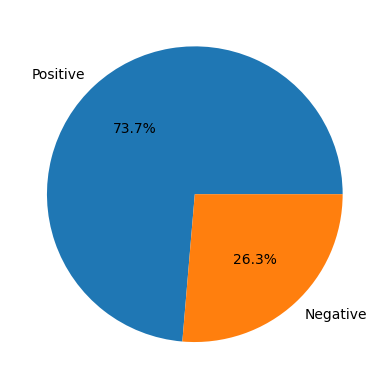

In [9]:
plt.pie(df['Rating'].value_counts(), labels = df['Rating'].unique().tolist(), autopct = '%1.1f%%')
plt.show()

In [10]:
length = len(df['Review'][0])
print(f'Length of a sample review: {length}')

Length of a sample review: 593


In [11]:
df['Length'] = df['Review'].str.len()
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",Positive,600
4,"great stay great stay, went seahawk game aweso...",Positive,1281


In [12]:
word_count = df['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 87


In [13]:
def word_count(review):
  review_list = review.split()
  return len(review_list)

In [14]:
df['Word_count'] = df['Review'].apply(word_count)
df.head()

,Review,Rating,Length,Word_count
0,nice hotel expensive parking got good deal sta...,Positive,593,87
1,ok nothing special charge diamond member hilto...,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191


In [15]:
df['mean_word_length'] = df['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head()

,Review,Rating,Length,Word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571


In [16]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
from nltk import tokenize
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['Review'][0])])

591.0

In [18]:
df['mean_word_length'] = df['Review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
df.head()

,Review,Rating,Length,Word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,591.0
1,ok nothing special charge diamond member hilto...,Negative,1689,250,1687.0
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,712.0
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,598.0
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,1279.0


In [19]:
df['mean_sent_length'] = df['Review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
df.head()

,Review,Rating,Length,Word_count,mean_word_length,mean_sent_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,591.0,591.0
1,ok nothing special charge diamond member hilto...,Negative,1689,250,1687.0,1687.0
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,712.0,712.0
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,598.0,598.0
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,1279.0,1279.0


In [20]:
features = df.columns.tolist()[2:]
df = df.drop(features, axis = 1)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,Negative
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  object
dtypes: object(2)
memory usage: 320.3+ KB


In [22]:
import re
from nltk.corpus import stopwords
def clean(review):
  review = review.lower()
  review = re.sub('[^a-z A-Z 0-9-]+', '', review)
  review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
  return review

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
df['Review'] = df['Review'].apply(clean)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms 4 experience hotel monaco seattle g...,Negative
3,unique great stay wonderful time hotel monaco ...,Positive
4,great stay great stay went seahawk game awesom...,Positive


In [28]:
def corpus(text):
  text_list = text.split()
  return text_list

In [30]:
df['Review_lists'] = df['Review'].apply(corpus)
df.head()

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms 4 experience hotel monaco seattle g...,Negative,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,Positive,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,Positive,"[great, stay, great, stay, went, seahawk, game..."


In [36]:
from tqdm import trange
corpus = []
for i in trange(df.shape[0], ncols = 150, nrows = 10, colour = 'green', smoothing = 0.0):
  corpus += df['Review_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 47871.61it/s]


2060911

In [38]:
from collections import Counter
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 48844),
 ('room', 34279),
 ('great', 21068),
 ('nt', 18989),
 ('good', 16953),
 ('staff', 16193),
 ('stay', 15142),
 ('nice', 12393),
 ('rooms', 12005),
 ('location', 11009)]

In [39]:
words = []
freq = []
for word, count in mostCommon:
  words.append(word)
  freq.append(count)

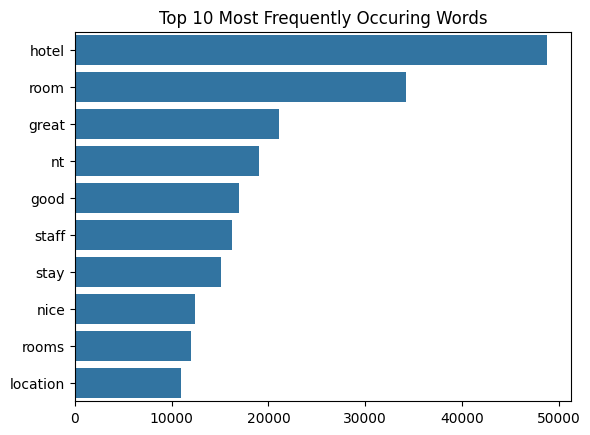

In [40]:
import seaborn as sns
sns.barplot(x = freq, y = words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()